In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train.shape[0]

60000

input data에 존재하는 하나의 이미지의 shape을 변경해줘야 한다. (28x28) => (28x28x1)<br>

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
x_train[0].shape

(28, 28, 1)

In [12]:
x_train = x_train/255 # 0 ~ 1 사이의 값으로 정규화 하기
x_test = x_test/255

In [10]:
y_train[0]

5

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=x_train[0].shape))

Conv2D에 대한 자세한 내용은 https://keras.io/layers/convolutional/ 참고 
또는 https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [51]:
# 2x2 크기의 filter를 사용해서 Max pooling 수행
model.add(MaxPooling2D(pool_size=(2, 2)))
# strides의 기본값 => pool_size

다시 한번 Conv2D와 MaxPooling2D를 적용합니다.

In [52]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 strides=(1,1),
                 activation='relu'))

In [53]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [54]:
model.add(Flatten())

Flatten()은 3차원 형태의 데이터를 1차원 형태로 변경하는 작업을 수행

In [55]:
model.add(Dense(64, activation='relu'))

In [56]:
model.add(Dense(10, activation = 'softmax'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [58]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['categorical_accuracy'])
# 아래와 동일
# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#                loss=tf.keras.losses.CategoricalCrossentropy(),
#                metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [59]:
from tensorflow.keras.utils import to_categorical 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [60]:
import matplotlib.pyplot as plt

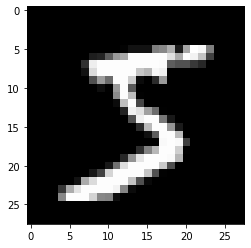

In [61]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [62]:
print(y_train[0])
y_train_one_hot[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [63]:
history = model.fit(x_train, y_train_one_hot, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 16s 37ms/step - loss: 1.9536 - categorical_accuracy: 0.3451 - val_loss: 0.9858 - val_categorical_accuracy: 0.7388
Epoch 2/20
422/422 [==============================] - 15s 36ms/step - loss: 0.6337 - categorical_accuracy: 0.8103 - val_loss: 0.3760 - val_categorical_accuracy: 0.8882
Epoch 3/20
422/422 [==============================] - 15s 36ms/step - loss: 0.3971 - categorical_accuracy: 0.8781 - val_loss: 0.2709 - val_categorical_accuracy: 0.9187
Epoch 4/20
422/422 [==============================] - 15s 36ms/step - loss: 0.2961 - categorical_accuracy: 0.9097 - val_loss: 0.1985 - val_categorical_accuracy: 0.9422
Epoch 5/20
422/422 [==============================] - 15s 36ms/step - loss: 0.2283 - categorical_accuracy: 0.9294 - val_loss: 0.1731 - val_categorical_accuracy: 0.9520
Epoch 6/20
422/422 [==============================] - 15s 36ms/step - loss: 0.1825 - categorical_accuracy: 0.9441 - val_loss: 0.1314 - val_categorical_accuracy:

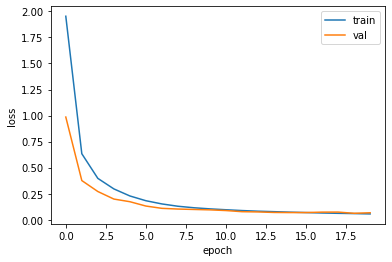

In [64]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

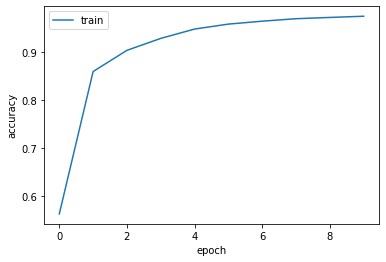

In [31]:
plt.plot(history.history['categorical_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'])
plt.show()

In [65]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0592 - categorical_accuracy: 0.9813
test_acc: 0.9812999963760376


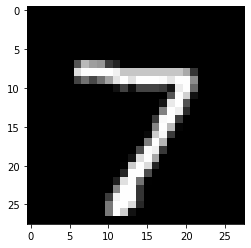

In [21]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [66]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1]) # 첫번째 이미지 in the test dataset

1/1 [==============================] - 0s 129ms/step


In [67]:
prediction

array([[0.0000000012, 0.0000005701, 0.0000024674, 0.000002135 ,
        0.          , 0.000000002 , 0.          , 0.99999344  ,
        0.0000000027, 0.0000013002]], dtype=float32)

In [68]:
y_test[0]

7

In [68]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [69]:
print(labels[np.argmax(prediction)])

7


In [70]:
range(0,10)[0]

0